<a href="https://colab.research.google.com/github/augusto-bonifacio001/augusto-bonifacio001/blob/main/omp_estudando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import numpy as np

def omp(Phi, y, s, epsilon=1e-6):
  """
  parâmetros:
  Phi- matriz de medição(m x n)
  y- vetor de medições (m x 1)
  s- esparsidade esperada (número de não-zeros)

  retona:
  x- vetor estimado (n x 1)
  """

  # inicialização

  m, n = Phi.shape    # obtém as dimensões da matriz Phi
  r = y.copy()        # r == y (resíduo inicial igual às medições)
  S = []              # S == 0 ( conjutno vazio de índices ativos)
  x = np.zeros        # inicializa o vetor solução com zeros

  # loop principal (executa no máximo s iterações)

  for k in range(s):
    # passo 1: encontrar a coluna de Phi que melhor explica o resíduo
    correlations = np.abs(Phi.T @ r) # calcula correlações entre Phi e o resíduo
    j = np.argmax(correlations) # encontra o índice da maior correlação

    # passo 2: adicionar o índice ao conjunto ativo (evitando duplicados)

    if j not in S:
      S.append(j)
    else:
      break

    # passo 3 : resolver o problema de mínimos quadrados apenas com as colunas selecionadas

    Phi_S = Phi[:, S] # submatriz apenas com as colunas ativas
    x_S = np.linalg.pinv(Phi_S) @ y #solução de mínimos quadrados

    # passo 4: atualizar o resíduo:

    r = y - Phi_S @ x_S

    # passo 5: verificar critério de parada:

    if np.linalg.norm(r) < epsilon:
      break


  # construir a solução final apenas com os valores encontrados:
  x = np.zeros(n)
  x[S] = x_S


  return x

  # exemplo de uso
m = 50 # número de medições
n = 100 # dimensão original do sinal
s = 10 # esparsidade

  # cria uma matriz de medição aleatória

Phi = np.random.randn(m, n)

  # cria um vetor esparso sintético

x_true = np.zeros(n)
x_true[np.random.choice(n, s, replace=False)] = np.random.randn(s)

  # gera as medições

y = Phi @ x_true

  # executa o OMP:

x_est = omp(Phi, y, s)

  # verifica o resultado
print("Erro:", np.linalg.norm(x_true - x_est))


Erro: 3.610289331801372e-15


In [ ]:
import numpy as np

def omp(Phi, y, s, epsilon=1e-6):
    """
    parâmetros:
    Phi - matriz de medição (m x n)
    y - vetor de medições (m x 1)
    s - esparsidade esperada (número de não-zeros)

    retorna:
    x - vetor estimado (n x 1)
    """
    # inicialização
    m, n = Phi.shape
    r = y.copy()
    S = []
    x = np.zeros(n)  # Corrigido: precisa especificar a dimensão (n)

    # loop principal
    for k in range(s):
        # passo 1: encontrar melhor coluna
        correlations = np.abs(Phi.T @ r)
        j = np.argmax(correlations)

        # passo 2: adicionar índice
        if j not in S:
            S.append(j)
        else:
            break

        # passo 3: resolver mínimos quadrados
        Phi_S = Phi[:, S]
        x_S = np.linalg.pinv(Phi_S) @ y

        # passo 4: atualizar resíduo
        r = y - Phi_S @ x_S

        # passo 5: verificar critério de parada
        if np.linalg.norm(r) < epsilon:
            break

    # construir solução final
    x = np.zeros(n)  # Recria o vetor para garantir dimensão correta
    x[S] = x_S

    return x

# Exemplo de uso (FORA da função)
m = 50  # número de medições
n = 100  # dimensão original do sinal
s = 10  # esparsidade

# cria matriz de medição aleatória
Phi = np.random.randn(m, n)

# cria vetor esparso sintético
x_true = np.zeros(n)
x_true[np.random.choice(n, s, replace=False)] = np.random.randn(s)

# gera as medições
y = Phi @ x_true

# executa o OMP
x_est = omp(Phi, y, s)

# verifica o resultado
print("Erro:", np.linalg.norm(x_true - x_est))
print("Vetor verdadeiro (não-zeros):", x_true[np.where(x_true != 0)])
print("Vetor estimado (não-zeros):", x_est[np.where(x_est != 0)])

Erro: 2.3921377574803994e-15
Vetor verdadeiro (não-zeros): [ 0.41344857  0.38642445  0.82944518 -0.72449043  0.94685847 -0.83153813
 -0.91118752 -0.58579775 -0.84166702  0.52403552]
Vetor estimado (não-zeros): [ 0.41344857  0.38642445  0.82944518 -0.72449043  0.94685847 -0.83153813
 -0.91118752 -0.58579775 -0.84166702  0.52403552]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[-0.71053304 -1.19751001 -0.93440619 ... -0.54167199 -0.61076862
   1.23379877]
 [ 0.42770758  0.88325606 -1.01212585 ...  1.02975289  0.98849905
   1.03951152]
 [-1.2308409   0.34953195  1.2806358  ... -0.93667556 -0.23851818
  -0.12355135]
 ...
 [-1.22867263 -1.06318114 -1.99612584 ... -0.6470815   0.3978171
  -1.19498108]
 [-1.03125328 -0.45939056  1.16443158 ...  0.2444718   0.64581896
   1.34160081]
 [ 1.07170118 -1.93969016  0.14137095 ... -0.60726474  0.14282422
   0.69003054]]


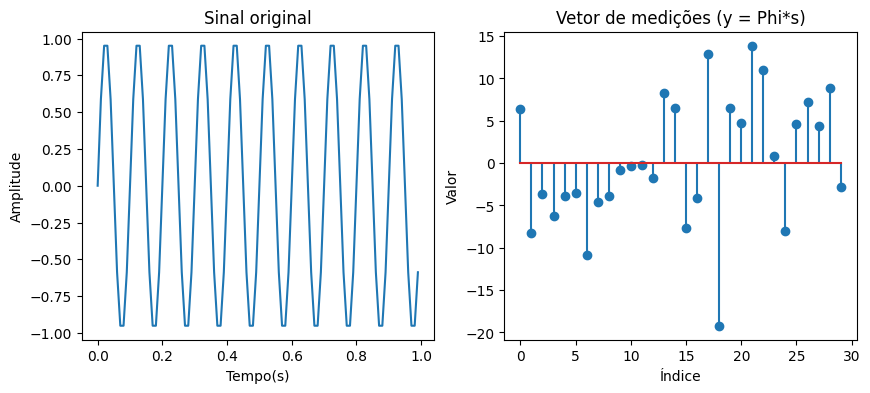

In [4]:
f = 10
fs = 100
T = 1
N = fs*T
t = np.linspace(0, T , N, endpoint = False)

s = np.sin(2*np.pi*f*t)

#criar a matriz aleatória

M = 30
Phi = np.random.randn(M, N) #(matriz gaussiana aleatória)
print(Phi)

# aplicar a compressão y = Phi*s

y = Phi @ s

plt.figure(figsize = (10, 4))

plt.subplot(1,2,1)
plt.plot(t, s)
plt.title("Sinal original")
plt.xlabel("Tempo(s)")
plt.ylabel("Amplitude")

plt.subplot(1,2,2)
plt.stem(y)
plt.title("Vetor de medições (y = Phi*s)")
plt.xlabel("Índice")
plt.ylabel("Valor")

plt.tight_layout
plt.show()


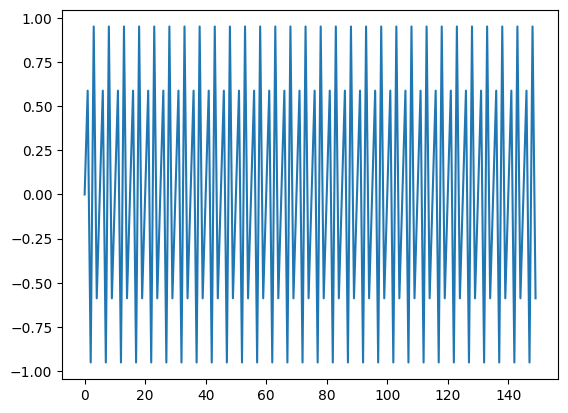

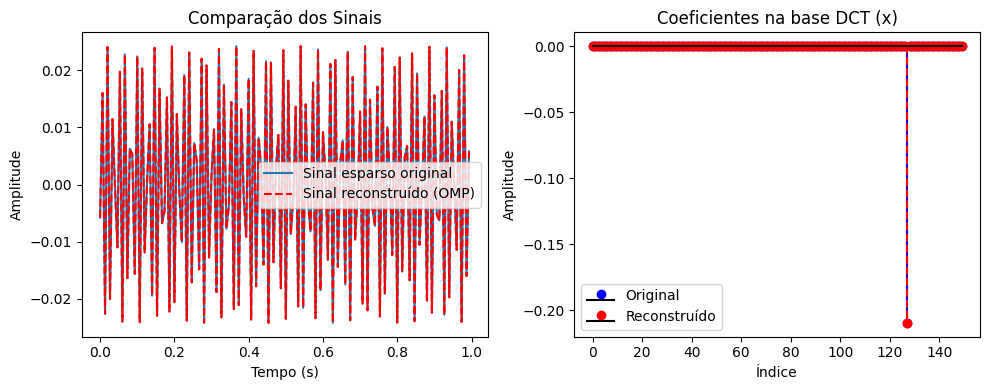

In [33]:
import numpy as np
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

# Parâmetros do sinal
f = 60      # frequência do seno (Hz)
fs = 150    # frequência de amostragem (Hz)
T = 1       # duração do sinal (segundos)
N = int(fs * T)  # número total de amostras

# Eixo do tempo
t = np.linspace(0, T, N, endpoint=False)

# ======================= ERRO AQUI ========================
# Esta linha está errada:
# s = np.sin(s * np.pi * f * t)
# ❌ Problema: você usa 's' dentro da função antes de definir 's'

# ✅ Correção:
s = np.sin(2 * np.pi * f * t)  # sinal senoidal
plt.plot(s)

# Número de coeficientes esparsos
K = 5

# Criar a base DCT (Psi)
Psi = dct(np.identity(N), norm='ortho')  # base ortonormal DCT

# ======================= ERRO LÓGICO AQUI ========================
# Estas linhas estão fora de ordem:
# x = np.zeros(N)
# idx = np.random.choice(N, K, replace=False)
# s = Psi @ x
# ❌ Problema: você está sobrescrevendo 's', que já era o sinal senoidal gerado acima
# ❌ E não está usando os coeficientes DCT reais

# ✅ Correção:
# Obtemos os coeficientes x reais (não esparsos) do sinal senoidal
x = Psi.T @ s  # projeção do sinal na base DCT

# Agora criamos uma versão esparsa com apenas K coeficientes diferentes de zero
x_sparse = np.zeros(N)
idx = np.random.choice(N, K, replace=False)
x_sparse[idx] = x[idx]  # mantém só K coeficientes reais

# Reconstrói o sinal esparso no domínio do tempo
s_sparse = Psi @ x_sparse

# Matriz de medição aleatória Phi (M << N)
M = 30
Phi = np.random.randn(M, N)

# Vetor de medições: y = Phi * s_sparse
y = Phi @ s_sparse  # M x 1

# Matriz A = Phi * Psi
A = Phi @ Psi

# Usar OMP para recuperar x
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=K)
omp.fit(A, y)
x_rec = omp.coef_  # vetor esparso reconstruído

# Reconstruir o sinal original: s_rec = Psi * x_rec
s_rec = Psi @ x_rec

# Plotar os resultados
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, s_sparse, label='Sinal esparso original')
plt.plot(t, s_rec, '--r', label='Sinal reconstruído (OMP)')
plt.title("Comparação dos Sinais")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(1, 2, 2)
plt.stem(x_sparse, linefmt='b-', markerfmt='bo', basefmt='k', label='Original')
plt.stem(x_rec, linefmt='r--', markerfmt='ro', basefmt='k', label='Reconstruído')
plt.title("Coeficientes na base DCT (x)")
plt.xlabel("Índice")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()
